# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Azzahra
- **Email:** auliaazzahra422@gmail.com
- **ID Dicoding:** auliaazzahra422

## Menentukan Pertanyaan Bisnis

Pada project kali ini saya menggunakan Data ***Bike Sharing Dataset*** dan melakukan eksplorasi data berdasarkan lima pertanyaan yang bertujuan untuk **mengindentifikasi pola penggunaan sepeda, pengaruh kondisi cuaca, tren penyewaan, serta insight yang relevan untuk pengambilan keputusan operasional**. Kelima pertanyaan tersebut yaitu:


1.   Bagaimana pola penyewaan sepeda berdasarkan waktu dan jenis hari?
2.   Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
3.   Pada jam berapa sistem bike sharing mengalami beban tertinggi dan bagaimana karakteristik waktunya?
4.   Apakah terdapat perubahan tren jumlah penyewaan sepeda antara tahun 2011 dan 2012?
5.   Berdasarkan pola waktu dan kondisi cuaca, kapan periode paling optimal untuk memaksimalkan operasional layanan bike sharing?



## Import Semua Packages/Library yang Digunakan

In [1]:
# Menyiapkan semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Load dataset tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berisi data penyewaan sepeda per jam selama 2011-2012, sehingga bisa digunakan untuk melihat pola penggunaan berdasarkan waktu.
- Data sudah mencakup informasi waktu, cuaca, dan jenis pengguna, yang relevan untuk analisis perilaku dan operasional layanan bike sharing.
- Tapi terdapat beberapa kekurangan yaitu beberapa kolom masih berbentuk angka padahal mempresentasikan kategori sehingga masih sulit dipahami/dibaca.

### Assessing Data

### Pengecekan tabel **hour_df**

In [4]:
# Memeriksa tipe data dari setiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Memeriksa kualitas data (Missing Values) dalam tabel hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
# Memeriksa data duplikat dan statistik deskriptif tabel hour_df
print("Jumlah duplikat:", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikat: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Pengecekan tabel **day_df**

In [7]:
# Memeriksa tipe data dari setiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Memeriksa kualitas data (Missing Values) dalam tabel day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# Memeriksa data duplikat dan statistik deskriptif tabel day_df
print("Jumlah duplikasi:", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset tidak memiliki missing value serta tidak ditemukan data duplikat.
- Beberapa kolom seperti musim, kondisi cuaca, hari kerja, dan hari libur masih bertipe numerik meskipun bersifat kategori, sehingga perlu penyesuaian tipe data.
- Terdapat kolom identifier yang tidak berkontribusi dan akan dihapus pada tahap cleaning.

### Cleaning Data

Pada tahapan ini kita akan melakukan:


*   Penghapusan kolom yang tidak relevan ➡ yaitu menghapus kolom identifier
*   Konversi tipe data waktu ➡ kolom tanggal dan variabel waktu akan diubah jadi angka
*   Penyesuaian tipe kategorikal ➡ mengubah beberapa variabel bertipe numerik menjadi kategori
*   Penyesuaian interprestasi variabel cuaca ➡ variabel cuaca telah dinormalisasi sehingga tidak mempresentasikan nilai
*   Konversi variabel kategorikal dan mengganti nama agar lebih mudah dipahami
*  Validasi akhir dataset ➡ memastikan dataset siap digunakan untuk selanjutnya



Dropping kolom yang tidak relevan

In [10]:
# Menghapus kolom instant karena tidak ada hubungannya
hour_df.drop(columns=["instant"], inplace=True)
day_df.drop(columns=["instant"], inplace=True)

Konversi tipe data waktu

In [11]:
# Mengubah tipe data dteday yang tadinya 'object' akan diubah menjadi 'datetime'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Penyesuaian tipe kategorikal

In [12]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season',
           'mnth',
           'holiday',
           'weekday',
           'weathersit']

for column in columns:
    hour_df[column] =  hour_df[column].astype("category")
    day_df[column] =  day_df[column].astype("category")

Penyesuaian interprestasi variabel cuaca

In [13]:
# Mengubah nama kolom agar memudahkan dibaca
weather_cols = {
    'temp' : 'temp_norm',
    'atemp' : 'atemp_norm',
    'hum' : 'hum_norm',
    'windspeed' : 'windspeed_norm'}

hour_df.rename(columns=weather_cols, inplace=True)
day_df.rename(columns=weather_cols, inplace=True)

In [14]:
# Menghitung humidity
hour_df['humidity'] = hour_df['hum_norm'] * 100
day_df['humidity'] = day_df['hum_norm'] * 100

In [15]:
# Mengklasifikasikan humidity agar mudah dibaca
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

Konversi variabel kategorikal dan mengganti nama kolom agar lebih mudah dipahami

In [16]:
# Mengganti nama kolom year, month, dan weather_situation
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation'
}, inplace=True)

In [17]:
# Mapping kategori ke label yang mudah dipahami

# Mapping season
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [18]:
# Mapping year
hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'})

day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'})

In [19]:
# Mapping month
hour_df['month'] = hour_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

day_df['month'] = day_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [20]:
# Mapping wather_situation
hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1:'Clear',
    2:'Misty',
    3:'Light Rain/Snow',
    4:'Heavy Rain/Snow'})

day_df['weather_situation'] = day_df['weather_situation'].map({
    1:'Clear',
    2:'Misty',
    3:'Light Rain/Snow',
    4:'Heavy Rain/Snow'})

In [21]:
# Mapping weekday
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'})


day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [22]:
# Mapping workingday
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Weekend/Holiday',
    1: 'Working Day'})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Weekend/Holiday',
    1: 'Working Day'})

In [23]:
# Mapping holiday
hour_df['holiday'] = hour_df['holiday'].map({
    0: 'No',
    1: 'Yes'})

day_df['holiday'] = day_df['holiday'].map({
    0: 'No',
    1: 'Yes'})

Validasi akhir dataset

In [24]:
# Memeriksa data hour_df
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  object        
 3   month              17379 non-null  category      
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  object        
 8   weather_situation  17379 non-null  category      
 9   temp_norm          17379 non-null  float64       
 10  atemp_norm         17379 non-null  float64       
 11  hum_norm           17379 non-null  float64       
 12  windspeed_norm     17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp_norm,atemp_norm,hum_norm,windspeed_norm,casual,registered,cnt,humidity,humidity_category
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16,81.0,Terlalu Lembab
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40,80.0,Terlalu Lembab
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32,80.0,Terlalu Lembab
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13,75.0,Terlalu Lembab
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1,75.0,Terlalu Lembab


In [25]:
# Memeriksa data day_df
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    object        
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    object        
 7   weather_situation  731 non-null    category      
 8   temp_norm          731 non-null    float64       
 9   atemp_norm         731 non-null    float64       
 10  hum_norm           731 non-null    float64       
 11  windspeed_norm     731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  cnt       

,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp_norm,atemp_norm,hum_norm,windspeed_norm,casual,registered,cnt,humidity,humidity_category
0,2011-01-01,Spring,2011,Jan,No,Saturday,Weekend/Holiday,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,80.5833,Terlalu Lembab
1,2011-01-02,Spring,2011,Jan,No,Sunday,Weekend/Holiday,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,69.6087,Terlalu Lembab
2,2011-01-03,Spring,2011,Jan,No,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,43.7273,Terlalu kering
3,2011-01-04,Spring,2011,Jan,No,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,59.0435,Ideal
4,2011-01-05,Spring,2011,Jan,No,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,43.6957,Terlalu kering


**Insight:**
- Struktur data sudah rapi dan konsisten antara hour_df dan day_df, sehingga analisis harian dan perjam bisa dibandingkan.
- Variabel kategorikal seperti season, weather, weekday, holiday, dan year kini lebih mudah dipahami.
- Variabel cuaca seperti temperature, atemp, humidity dan windspeed sudah dalam bentuk nilai ter-normalisasi sehingga tidak memerlukan perhitungan ulang. Hanya saja untuk humidity dilakukan konversi skala dan ditampilkan dalam bentuk presentase agar memudahkan interpretasi.

## Exploratory Data Analysis (EDA)

### Explore Data *hour_df*

In [26]:
# Melihat parameter statistik dari data hour_df
hour_df.describe(include="all")

,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp_norm,atemp_norm,hum_norm,windspeed_norm,casual,registered,cnt,humidity,humidity_category
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012,Jul,NaN,No,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terlalu Lembab
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8356
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,62.722884,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,48.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,63.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,78.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,100.000000,NaN


Pola penyewaan sepeda berdasarkan waktu dan hari

In [27]:
# Menghitung rata-rata, minimum, dan maksimum jumlah penyewaan berdasarkan jam
hour_df.groupby("hour")["cnt"].agg(["mean", "min", "max"])

,mean,min,max
hour,,,
0,53.898072,2,283
1,33.375691,1,168
2,22.869930,1,132
3,11.727403,1,79
4,6.352941,1,28
5,19.889819,1,66
6,76.044138,1,213
7,212.064649,1,596
8,359.011004,5,839


In [28]:
# Mengidentifikasi jam dengan rata-rata penyewaan tertinggi
hour_df.groupby("hour")["cnt"].mean().sort_values(ascending=False)

,cnt
hour,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


In [29]:
# Menghitung rata-rata penyewaan berdasarkan hari dalam minggu
hour_df.groupby("weekday")["cnt"].mean()

/tmp/ipython-input-3144057836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("weekday")["cnt"].mean()


,cnt
weekday,
Sunday,177.468825
Monday,183.744655
Tuesday,191.238891
Wednesday,191.130505
Thursday,196.436665
Friday,196.135907
Saturday,190.209793


In [30]:
# Membandingkan pola penyewaan antara hari kerja dan hari non-kerja
hour_df.groupby("workingday")["cnt"].mean()

,cnt
workingday,
Weekend/Holiday,181.405332
Working Day,193.207754


In [31]:
# Menghitung rata-rata penyewaan pada hari libur
hour_df.groupby("holiday")["cnt"].mean()

/tmp/ipython-input-3033360624.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("holiday")["cnt"].mean()


,cnt
holiday,
No,190.42858
Yes,156.87000


**Insight** :

Insight yang didapatkan dari analisa data-data diatas yaitu pola penyewaan sepeda menunjukan ritme waktu yang jelas dengan puncak penyewaan terjadi pada jam 17.00-18.00. Aktivitas penyewaan lebih ramai pada hari kerja (workingday) dibandingkan hari non-kerja, serta cenderung lebih tinggi pada hari kamis da jumat. Temuan ini mengindikasikan bahwa layanan bike sharing banyak digunakan sebagai sarana mobilitas rutin, khususnya pada jam pulang kerja.

Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda

In [32]:
# Menghitung rata-rata, minimum, dan maksimum penyewaan berdasarkan kondisi cuaca
hour_df.groupby("weather_situation")["cnt"].agg(["mean", "min", "max"])

/tmp/ipython-input-1356170626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("weather_situation")["cnt"].agg(["mean", "min", "max"])


,mean,min,max
weather_situation,,,
Clear,204.869272,1,977
Misty,175.165493,1,957
Light Rain/Snow,111.579281,1,891
Heavy Rain/Snow,74.333333,23,164


In [33]:
# Melihat statistik deskriptif variabel cuaca
hour_df[["temp_norm", "atemp_norm", "hum_norm", "windspeed_norm"]].describe().T

,count,mean,std,min,25%,50%,75%,max
temp_norm,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp_norm,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum_norm,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed_norm,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507


In [34]:
# Mengukur korelasi antara variabel cuaca dan jumlah penyewaan (level jam)
hour_df[["temp_norm", "atemp_norm", "hum_norm", "windspeed_norm", "cnt"]].corr()

,temp_norm,atemp_norm,hum_norm,windspeed_norm,cnt
temp_norm,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp_norm,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum_norm,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed_norm,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


**Insight:**

Jumlah penyewaan sepeda dipengaruhi oleh kondisi cuaca pada level jam. Penyewaan cenderung lebih tinggi saat kondisi cuaca cerah dan suhu lebih hangat, sementara kelembapan tinggi dan kondisi cuaca buruk berkaitan dengan penurunan jumlah penyewa. Hal ini menunjukan ternyata pengguna bike sharing cukup sensitive terhadap perubahan cuaca dalam waktu singkat, terutama pada mobilitas harian.

Identifikasi jam dengan beban sistem tertinggi (peak hours)

In [35]:
# Mengidentifikasi lima jam dengan rata-rata penyewaan tertinggi
hour_df.groupby("hour")["cnt"].mean().sort_values(ascending=False).head(5)

,cnt
hour,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352


In [36]:
# Melihat nilai maksimum penyewaan pada tiap jam
hour_df.groupby("hour")["cnt"].agg(["mean", "max"])

,mean,max
hour,,
0,53.898072,283
1,33.375691,168
2,22.869930,132
3,11.727403,79
4,6.352941,28
5,19.889819,66
6,76.044138,213
7,212.064649,596
8,359.011004,839


In [37]:
# Menghitung rata-rata peminjaman per jam
peak = hour_df.groupby('hour')['cnt'].mean().reset_index()

In [38]:
# Membandingkan peak hours antara hari kerja dan hari non-kerja
hour_df.groupby(["workingday", "hour"])["cnt"].mean()

workingday       hour
Weekend/Holiday  0        90.800000
                 1        69.508696
                 2        53.171053
                 3        25.775330
                 4         8.264317
                 5         8.689189
                 6        18.742358
                 7        43.406926
                 8       105.653680
                 9       171.623377
                 10      255.909091
                 11      315.316017
                 12      366.259740
                 13      372.731602
                 14      364.645022
                 15      358.813853
                 16      352.727273
                 17      323.549784
                 18      281.056522
                 19      231.673913
                 20      174.739130
                 21      142.060870
                 22      116.060870
                 23       85.930435
Working Day      0        36.786290
                 1        16.552632
                 2         8.683778
                 3         4.942553
                 4         5.429787
                 5        24.913131
                 6       102.500000
                 7       290.612903
                 8       477.006048
                 9       241.518145
                 10      135.366935
                 11      158.229839
                 12      200.820926
                 13      198.429719
                 14      183.572289
                 15      201.331325
                 16      293.122244
                 17      525.290581
                 18      492.226908
                 19      348.401606
                 20      249.718876
                 21      186.287149
                 22      138.389558
                 23       88.708835
Name: cnt, dtype: float64

**Insight:**

Beban sistem bike sharing mencapai titik tertinggi pada jam 17.00-18.00, yang merupakan peak hours utama dan paling dominan pada hari kerja. Sedangkan pada akhir pekan atau hari libur, pola peak hours bergeser ke rentang 12.00-17.00, menunjukkan penggunaan bersifat rekreasi dibanding mobilitas rutin. Pola ini menegaskan bahwa tekanan operasional sistem berbeda bergantung jenis hari dan waktu penggunaan.

Identifikasi periode optimal untuk operasional layanan bike sharing

In [39]:
# Mengidentifikasi kombinasi jam dan jenis hari dengan rata-rata penyewaan tertinggi
hour_df.groupby(["workingday", "hour"])["cnt"].mean().sort_values(ascending=False).head(10)

workingday       hour
Working Day      17      525.290581
                 18      492.226908
                 8       477.006048
Weekend/Holiday  13      372.731602
                 12      366.259740
                 14      364.645022
                 15      358.813853
                 16      352.727273
Working Day      19      348.401606
Weekend/Holiday  17      323.549784
Name: cnt, dtype: float64

In [40]:
# Mengidentifikasi jam dengan performa tinggi pada kondisi cuaca tertentu
hour_df.groupby(["weather_situation", "hour"])["cnt"].mean()

/tmp/ipython-input-780438214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["weather_situation", "hour"])["cnt"].mean()


weather_situation  hour
Clear              0       59.161554
                   1       34.395918
                   2       22.817992
                   3       11.995604
                   4        6.413567
                             ...    
Heavy Rain/Snow    19            NaN
                   20            NaN
                   21            NaN
                   22            NaN
                   23            NaN
Name: cnt, Length: 96, dtype: float64

In [41]:
# Mengelompokkan data berdasarkan jam dan status hari kerja (workingday)
hourly_pattern = hour_df.groupby(['hour', 'workingday'])['cnt'].mean().reset_index()

**Insight**:

Periode paling optimal untuk operasional layanan bike sharing terjadi pada hari kerja (working day) pukul 17.00–18.00, dengan rata-rata penyewaan tertinggi, mencapai sekitar 525 unit pada jam 17.00 dan 492 unit pada jam 18.00. Selain itu, terdapat peningkatan signifikan pada jam 08.00 pagi, yang berkaitan dengan aktivitas berangkat kerja.

Sementara pada akhir pekan atau hari libur, penyewaan cenderung lebih merata dengan puncak terjadi pada rentang jam 12.00–16.00, terutama sekitar jam 13.00–14.00. Pola ini menunjukkan perbedaan karakter penggunaan, di mana hari kerja didominasi mobilitas rutin, sedangkan akhir pekan lebih bersifat rekreasional.

### Explore Data *day_df*

In [42]:
# Melihat parameter statistik dari data day_df
day_df.describe(include="all")

,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp_norm,atemp_norm,hum_norm,windspeed_norm,casual,registered,cnt,humidity,humidity_category
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012,Jan,No,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ideal
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,62.789406,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,52.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,62.666700,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,73.020850,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,97.250000,NaN


Pola penyewaan sepeda berdasarkan waktu dan jenis hari (day_df)

In [43]:
# Menghitung rata-rata penyewaan berdasarkan bulan
day_df.groupby("month")["cnt"].mean()

/tmp/ipython-input-2114788412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("month")["cnt"].mean()


,cnt
month,
Jan,2176.338710
Feb,2655.298246
Mar,3692.258065
Apr,4484.900000
May,5349.774194
Jun,5772.366667
Jul,5563.677419
Aug,5664.419355
Sep,5766.516667


**Insight:**

Jumlah penyewaan sepeda cenderung meningkat dari bulan Mei hingga September. Menunjukkan adanya tren musiman dengan permintaan yang lebih tinggi pada periode tersebut. Hal ini mengindikasikan bahwa faktor musim atau cuaca kemungkinan berperan penting.

Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda

In [44]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca (level harian)
day_df.groupby("weather_situation")["cnt"].mean()

/tmp/ipython-input-2708753451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("weather_situation")["cnt"].mean()


,cnt
weather_situation,
Clear,4876.786177
Misty,4035.862348
Light Rain/Snow,1803.285714


In [45]:
# Mengukur korelasi variabel cuaca terhadap jumlah penyewaan (level harian)
day_df[["temp_norm", "atemp_norm", "hum_norm", "windspeed_norm", "cnt"]].corr()

,temp_norm,atemp_norm,hum_norm,windspeed_norm,cnt
temp_norm,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp_norm,0.991702,1.000000,0.139988,-0.183643,0.631066
hum_norm,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed_norm,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


**Insight**:

Jumlah penyewaan sepeda lebih tinggi jetika kondisi cuaca cerah (clear) dan suhu hangat, sedangkan penyewaan menurun pada kondisi cuaca buruk. Hal ini menunjukkan bahwa pengguna bike sharing lebih memilih beraktivitas di luar ruangan saat cucaca mendukung.

Perubahan tren jumlah penyewaan antara tahun 2011 dan 2012

In [46]:
# Menghitung ringkasan statistik penyewaan per tahun
day_df.groupby("year")["cnt"].agg(["mean", "min", "max", "sum"])

,mean,min,max,sum
year,,,,
2011,3405.761644,431,6043,1243103
2012,5599.934426,22,8714,2049576


In [47]:
# Menghitung total penyewaan per tahun
yearly_rentals = day_df.groupby('year')['cnt'].sum().reset_index()

In [48]:
# Menghitung rata-rata penyewaan bulanan untuk masing-masing tahun
day_df.groupby(["year", "month"])["cnt"].mean()

/tmp/ipython-input-16828437.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["year", "month"])["cnt"].mean()


year  month
2011  Jan      1231.903226
      Feb      1721.964286
      Mar      2065.967742
      Apr      3162.333333
      May      4381.322581
      Jun      4783.733333
      Jul      4559.387097
      Aug      4409.387097
      Sep      4247.266667
      Oct      3984.225806
      Nov      3405.566667
      Dec      2816.870968
2012  Jan      3120.774194
      Feb      3556.448276
      Mar      5318.548387
      Apr      5807.466667
      May      6318.225806
      Jun      6761.000000
      Jul      6567.967742
      Aug      6919.451613
      Sep      7285.766667
      Oct      6414.225806
      Nov      5088.800000
      Dec      3990.741935
Name: cnt, dtype: float64

In [49]:
# Mengukur tingkat variasi penyewaan per tahun
day_df.groupby("year")["cnt"].std()

,cnt
year,
2011,1378.753666
2012,1788.667868


**Insight**:

Jumlah penyewaan sepedaa meningkat dari 2011 ke 2012, menunujukkan pertumbuhan layanan bike sharing. Hal ini menandakan adanya peningkatan adopsi pengguna dan perubahan perilaku pemakaian secara makro yang menjadi indikasi positif bagi perkembangan layanan.

Identifikasi periode optimal untuk operasional layanan bike sharing

In [50]:
# Mengidentifikasi musim dengan rata-rata penyewaan tertinggi
day_df.groupby("season")["cnt"].mean()

/tmp/ipython-input-2205577672.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season")["cnt"].mean()


,cnt
season,
Spring,2604.132597
Summer,4992.331522
Fall,5644.303191
Winter,4728.162921


In [51]:
# Mengidentifikasi bulan dengan rata-rata penyewaan tertinggi
day_df.groupby("month")["cnt"].mean().sort_values(ascending=False)

/tmp/ipython-input-3170648666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("month")["cnt"].mean().sort_values(ascending=False)


,cnt
month,
Jun,5772.366667
Sep,5766.516667
Aug,5664.419355
Jul,5563.677419
May,5349.774194
Oct,5199.225806
Apr,4484.900000
Nov,4247.183333
Mar,3692.258065


**Insight:**

Periode paling optimal untuk memaksimalkan operasional layanan bike sharing terjadi pada musim Fall dengan total pengguna 5.644. Penyewaan tertinggi terjadi pada bulan Juni dan Septembe, menunjukan bahwa kapasita layanan sebaiknya difokuskan pada periode musiman ini untuk mendukung efiesiensi operasional.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan waktu dan jenis hari?

/tmp/ipython-input-3931123826.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='weekday', y='cnt', palette='viridis')
/tmp/ipython-input-3931123826.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour_df, x='month', y='cnt', palette='magma')


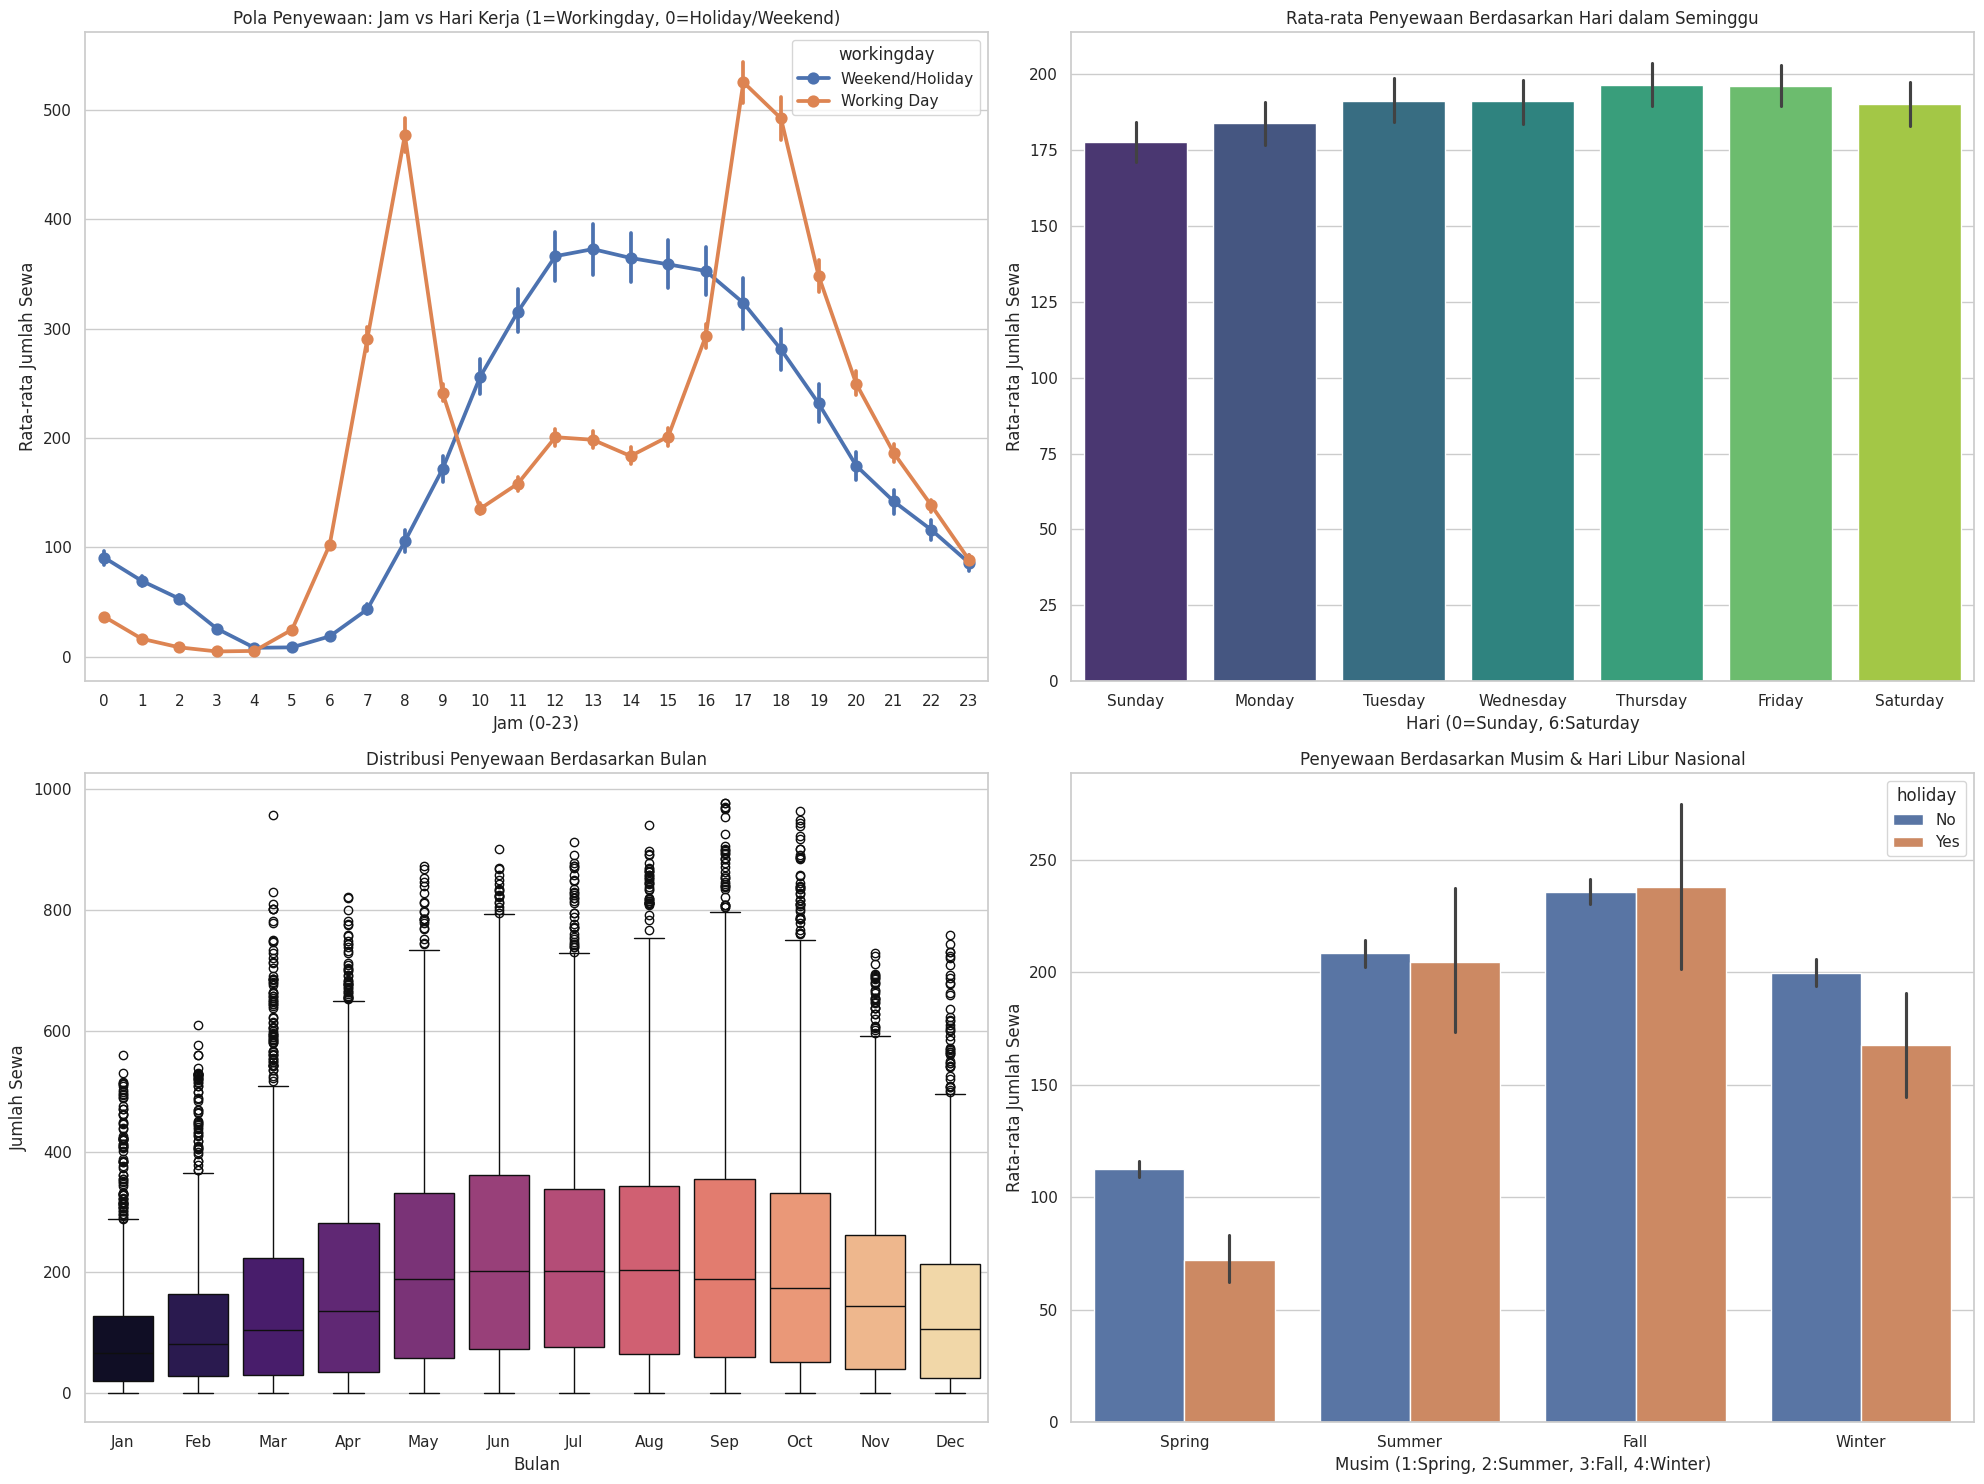

In [52]:
# Set tema visualisasi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

# Pola Berdasarkan Jam dan Hari Kerja vs Hari Libur
plt.subplot(2, 2, 1)
sns.pointplot(data=hour_df, x='hour', y='cnt', hue='workingday')
plt.title('Pola Penyewaan: Jam vs Hari Kerja (1=Workingday, 0=Holiday/Weekend)')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Sewa')

# Pola Berdasarkan Hari dalam Seminggu (Weekday)
# 0: Sunday, 2: Monday, ..., 6: Saturday
plt.subplot(2, 2, 2)
sns.barplot(data=hour_df, x='weekday', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari (0=Sunday, 6:Saturday')
plt.ylabel('Rata-rata Jumlah Sewa')

# Pola Berdasarkan Bulan
plt.subplot(2, 2, 3)
sns.boxplot(data=hour_df, x='month', y='cnt', palette='magma')
plt.title('Distribusi Penyewaan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')

# Pola Berdasarkan Musim (Season)
# 1: Semi, 2: Panas, 3: Gugur, 4: Dingin
plt.subplot(2, 2, 4)
sns.barplot(data=hour_df, x='season', y='cnt', hue='holiday')
plt.title('Penyewaan Berdasarkan Musim & Hari Libur Nasional')
plt.xlabel('Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Rata-rata Jumlah Sewa')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4112962175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pivot = hour_df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()


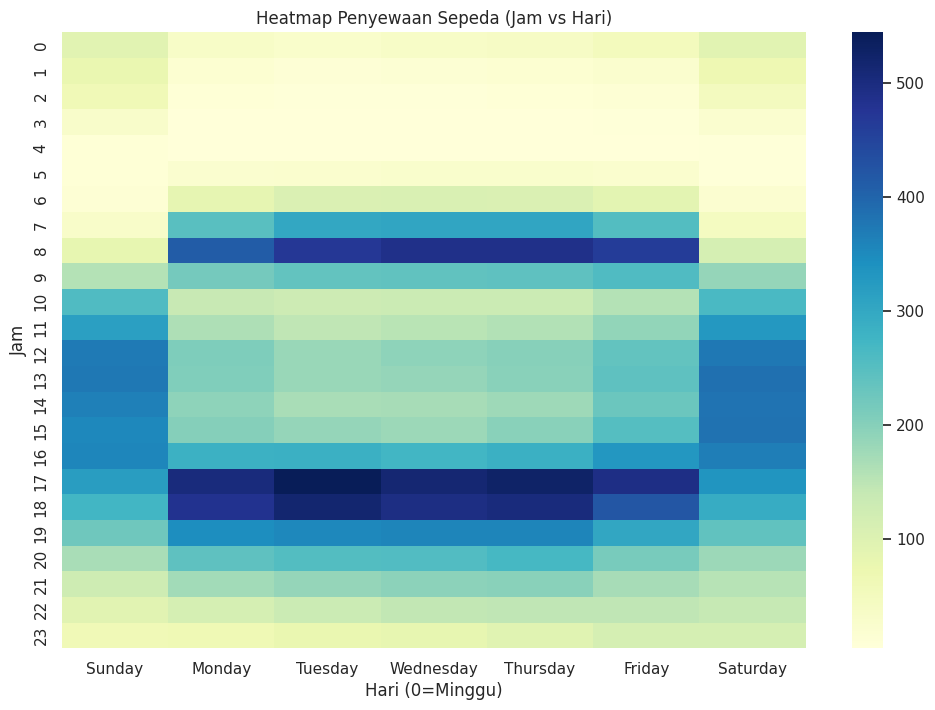

In [53]:
# Heatmap hubungan hari x jam
plt.figure(figsize=(12, 8))
df_pivot = hour_df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()
sns.heatmap(df_pivot, annot=False, cmap="YlGnBu")
plt.title('Heatmap Penyewaan Sepeda (Jam vs Hari)')
plt.xlabel('Hari (0=Minggu)')
plt.ylabel('Jam')
plt.show()

### Insight

**Pola Penyewaan Berdasarkan Jam dan Hari Kerja vs Hari Libur**
*  Hari kerja menunjukan dua puncak penyewaan yaitu pukul 08.00 pagi dan 17.00 sore. ➡ pola ini mencerminkan penggunaan sepeda untuk berangkat dan pulang kerja.
*  Hari libur memiliki pola yang lebih landai dengan puncak di siang hari (12.00-15.00) ➡ hal ini menunjukkan sepeda lebih banyak digunakan untuk aktivitas rekreasi.

**Pola Penyewaan per Hari dalam Seminggu (Weekday)**
*  Jumlah penyewaan relatif stabil sepanjang minggu.
*  Terdapat sedikit peningkatan pada hari jumat dan sabtu.
*  Menunjukkan aktivitas cenderung meningkat menjelang akhir pekan.

**Pola Penyewaan Bulanan**
*  Penyewaan meningkat pada pertengahan tahun, terutama bulan Juni-September.
*  Penyewaan menurung pada awal tahun seperti pada Januari-Februari.
Pola ini mengindikasikan adanya pengaruh musim terhdapa penggunaan musim.

**Penyewaan berdasarkan Hari Libur vs Hari Biasa terhadap Musim**
*  Jumlah penyewaan lebih tinggi pada musim gugur (Fall).
*  Jumlah penyewaan pada hari libur cenederung lebih rendah daripada hari kerja ➡ menunjukkan layanan bike sharing lebih sering digunakan untuk aktivitas rutin.

**Heatmap hubungan Hari x Jam**
* Rush hour terjadi pada Senin-Jumat (07.00-09.00) dan (17.00-18.00) ➡ penggunan sangat tinggi didominasi oleh pekerja dan pelajar.
* Leisure peak terjadi pada Sabtu-Minggu (10.00-17.00) ➡ pengguna stabil sepanjang siang dan didominasi oleh turis atau aktivitas santai.


### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

/tmp/ipython-input-661672180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_situation', y='cnt', data=day_df, palette='viridis')


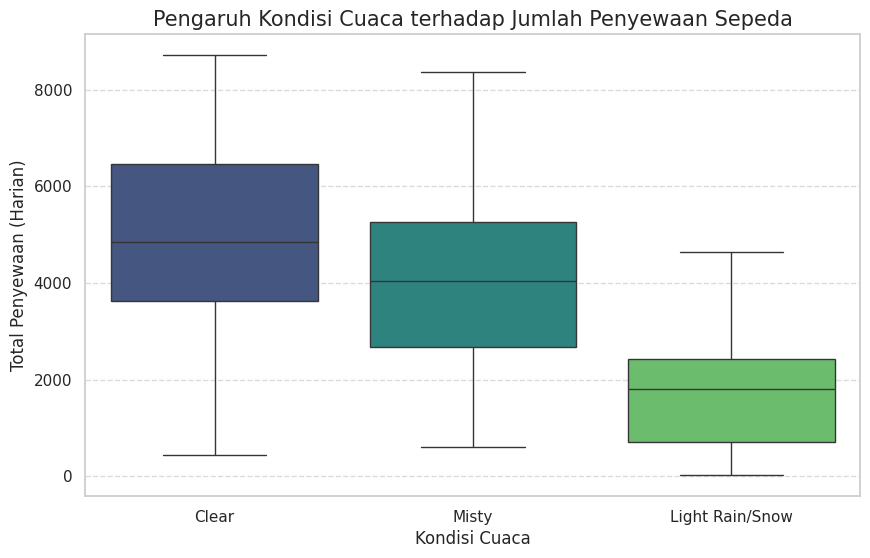

Rata-rata penyewaan berdasarkan cuaca:
weather_situation
Clear              4876.786177
Misty              4035.862348
Light Rain/Snow    1803.285714
Name: cnt, dtype: float64


/tmp/ipython-input-661672180.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weather = day_df.groupby('weather_situation')['cnt'].mean().sort_values(ascending=False)


In [54]:
# Membuat visualisasi menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_situation', y='cnt', data=day_df, palette='viridis')

# Menambah keterangan
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=15)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewaan (Harian)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Melihat rata-rata penyewaan per kondisi cuaca
avg_weather = day_df.groupby('weather_situation')['cnt'].mean().sort_values(ascending=False)
print("Rata-rata penyewaan berdasarkan cuaca:")
print(avg_weather)

### Insight

*   Cuaca cerah adalah "Prime Time" karena data menunjukkan bahwa penyewaan mencapai puncaknya pada kondisi cuaca cerah.
*   Terdapat penurunan jumlah penyewaan yang signifikan saat cuaca bergeser ke kabut atau mendung (Misty) dan merosot tajam pada kategori Hujan (Light Rain/Snow)
* Pada cuaca ekstrem permintaan bukan lagi menurun tetapi bisa berhenti total.



### Pertanyaan 3: Pada jam berapa sistem bike sharing mengalami beban tertinggi dan bagaimanna karakteristik waktunya?

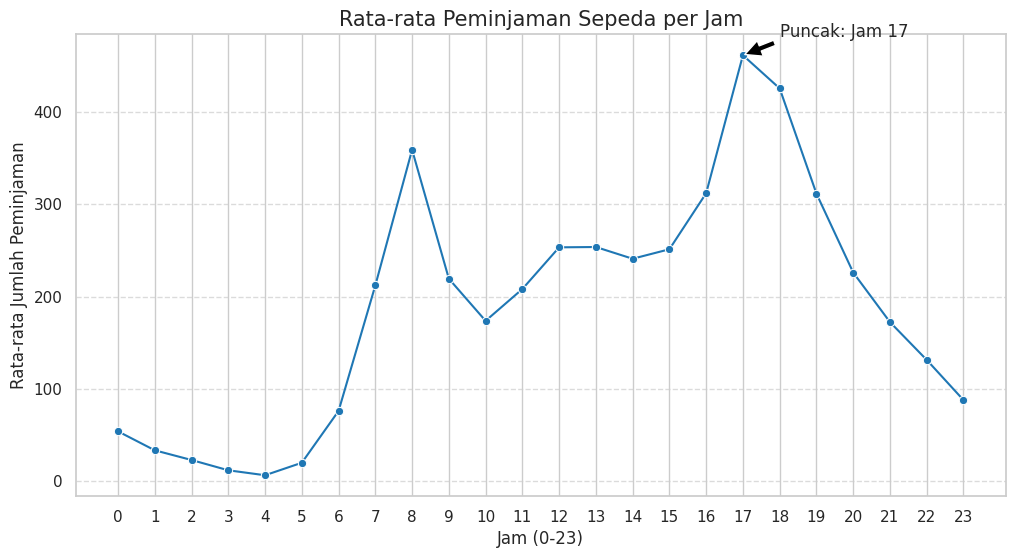

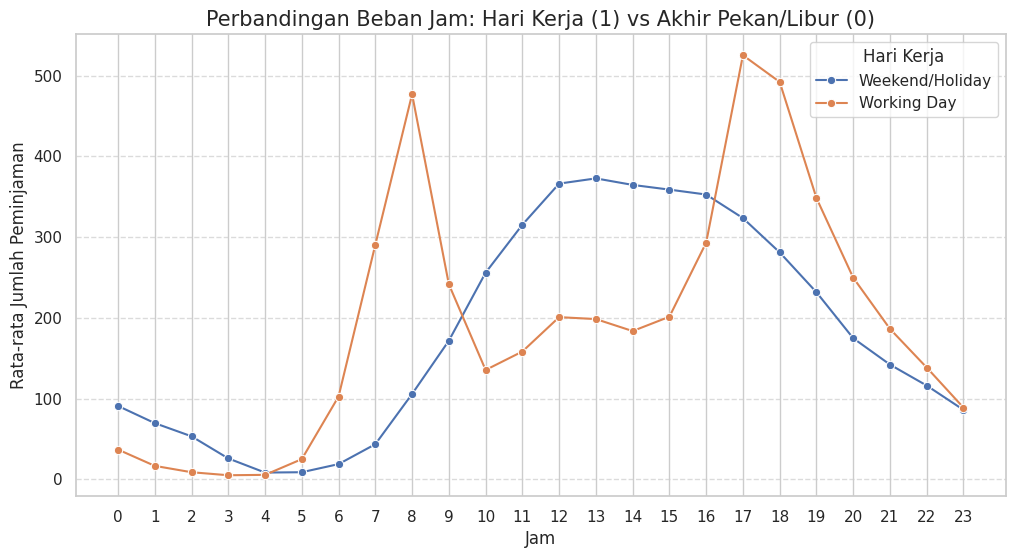

In [55]:
# Visualisasi data
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak, x='hour', y='cnt', marker='o', color='tab:blue')

# Menambahkan detail grafik
plt.title('Rata-rata Peminjaman Sepeda per Jam', fontsize=15)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyoroti beban tertinggi
max_hour = peak.loc[peak['cnt'].idxmax(), 'hour']
max_val = peak['cnt'].max()
plt.annotate(f'Puncak: Jam {int(max_hour)}',
             xy=(max_hour, max_val),
             xytext=(max_hour+1, max_val+20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Karakteristik berdasarkan tipe hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hour', y='cnt', hue='workingday', marker='o', errorbar=None)
plt.title('Perbandingan Beban Jam: Hari Kerja (1) vs Akhir Pekan/Libur (0)', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Hari Kerja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight

***Jam Beban Tertinggi***

*  Beban penyewaan tertinggi terjadi pada sore hari, khususnya pukul 17.00–18.00. Selain itu, terdapat puncak lain di pagi hari sekitar pukul 08.00. ➡ dengan pola ini menunjukkan jam-jam krusial ketika sepeda paling banyak digunakan.

**Karakteristik Waktu**

*  Hari kerja (working day): Pola penyewaan membentuk dua puncak yang jelas. Lonjakan terjadi saat jam berangkat kerja (sekitar 08.00) dan jam pulang kerja (17.00–18.00), menandakan bahwa pengguna didominasi oleh komuter.
*  Hari libur / Akhir pekan: Pola penggunaan berubah dan tidak menunjukkan lonjakan tajam di pagi hari. Penyewaan meningkat secara bertahap mulai pukul 10.00 dan mencapai puncak pada siang hingga sore hari (12.00–15.00), yang mengindikasikan penggunaan untuk aktivitas santai atau rekreasi.

**Jam Beban Terendah**
*  Beban penyewaan paling rendah terjadi pada dini hari, antara pukul 00.00 hingga 04.00. Pada rentang waktu ini, aktivitas mobilitas masyarakat berada pada titik paling minimum.

### Pertanyaan 4: Apakah terdapat perubahan tren jumlah penyewaan sepeda antara tahun 2011 dan 2012?

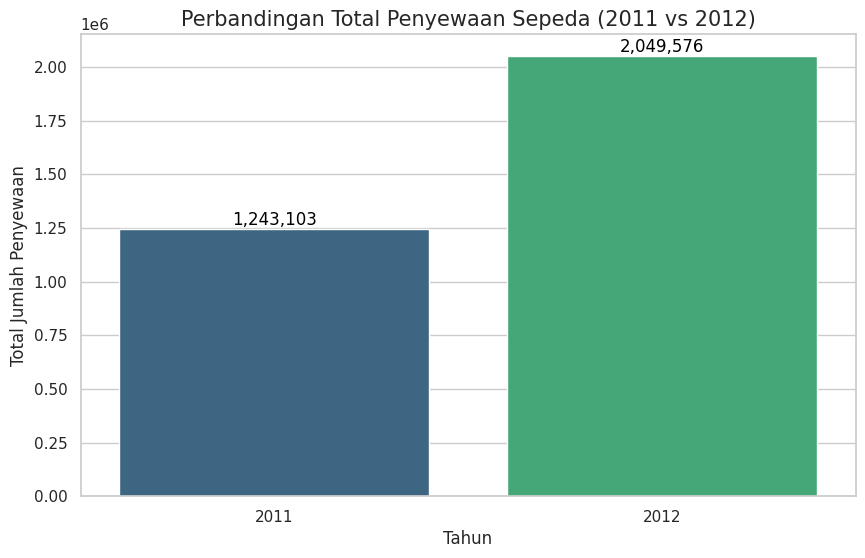

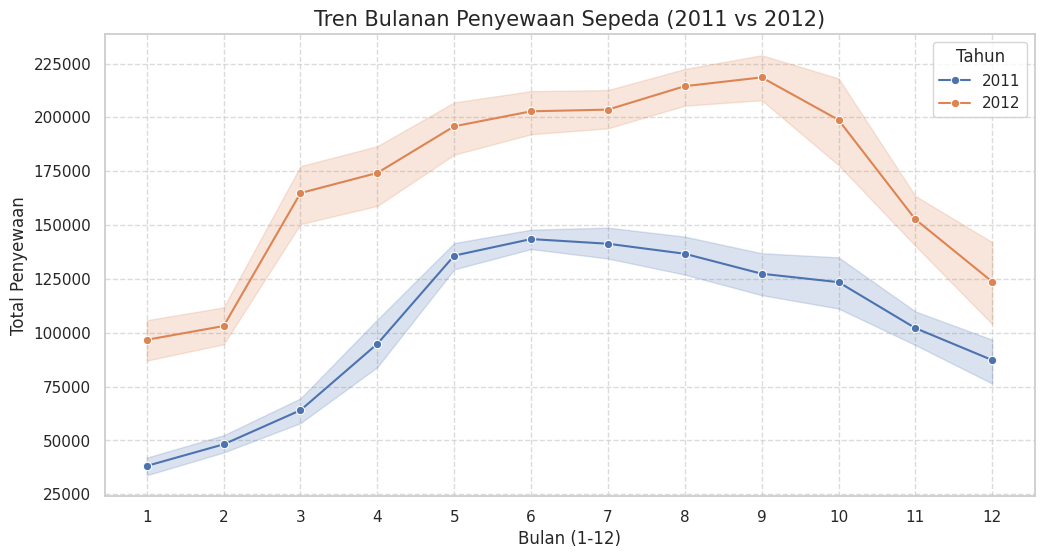

In [56]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Menggunakan Barplot untuk perbandingan total
sns.barplot(data=yearly_rentals, x='year', y='cnt', hue='year', palette='viridis', legend=False)

# Menambahkan judul dan label
plt.title('Perbandingan Total Penyewaan Sepeda (2011 vs 2012)', fontsize=15)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Jumlah Penyewaan', fontsize=12)

# Menambahkan angka total di atas bar
for index, row in yearly_rentals.iterrows():
    plt.text(index, row.cnt, f'{row.cnt:,}', color='black', ha="center", va="bottom")

plt.show()

# Melihat tren bulanan untuk melihat perubahan lebih detail
day_df['numeric_month'] = day_df['dteday'].dt.month # mengambil nilai bulan dari kolom tanggal

# Visualisasi tren bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='numeric_month', y='cnt', hue='year', marker='o', estimator=sum)

plt.title('Tren Bulanan Penyewaan Sepeda (2011 vs 2012)', fontsize=15)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tahun')
plt.show()

### Insight:

**Perbandingan total penyewaan bike sharing tahun 2011 vs 2012**

* Pada grafik menunjukkan perbandingan total penyewaan per tahun. Terlihat bahwa jumlah penyewaan pada tahun 2012 jauh lebih tinggi dibandingkan tahun 2011, menandakan adanya peningkatan yang signifikan.

**Tren penyewaan bulana penyewaan sepeda 2011-2012**

* Berdasarkan grafik menampilkan tren penyewaan per bulan untuk masing-masing tahun. Hampir di setiap bulan, jumlah penyewaan pada tahun 2012 lebih tinggi dibandingkan bulan yang sama di tahun 2011, sehingga peningkatan terjadi secara konsisten sepanjang tahun.

**Kesimpulan**

* Terjadi tren pertumbuhan yang jelas dari tahun 2011 ke tahun 2012.
* Peningkatan ini menunjukkan bahwa layanan bike sharing semakin diminati oleh masyarakat.
* Selain itu, kemungkinan terdapat penambahan armada atau perluasan stasiun yang mendukung pertumbuhan tersebut.

### Pertanyaan 5: Berdasarkan pola waktu dan kondisi cuaca, kapan periode optimal untuk memaksimalkan operasional layanan bike sharing?

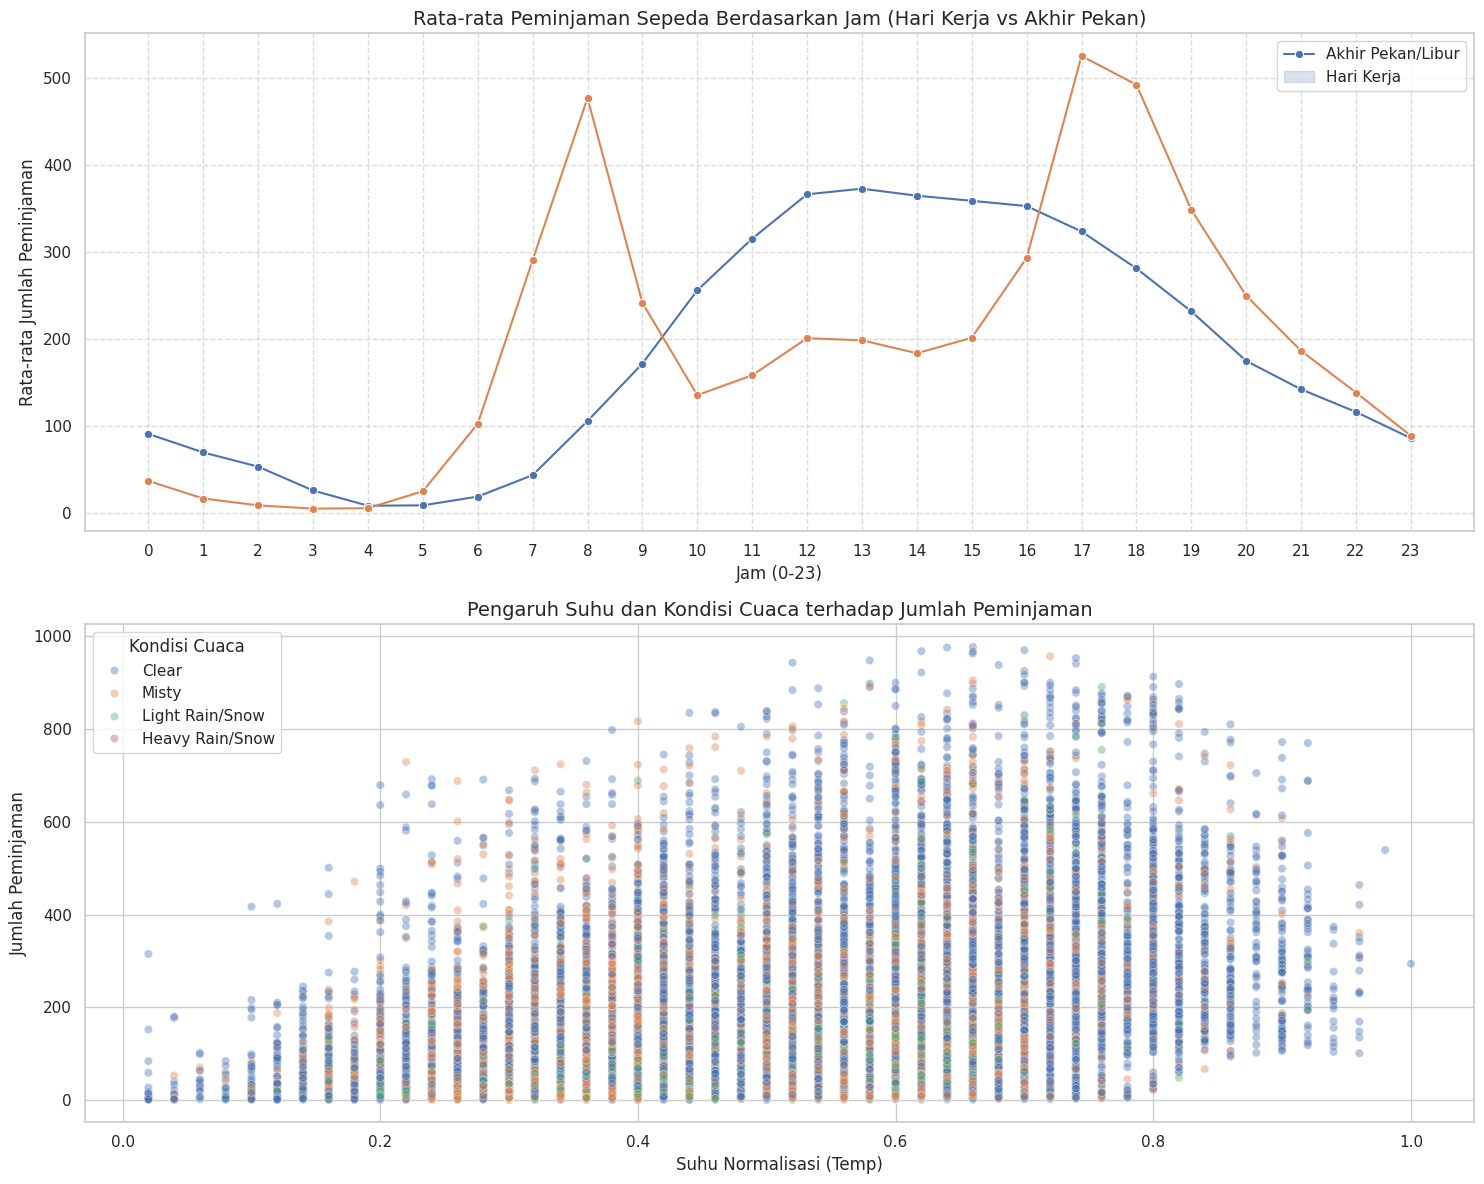

In [57]:
# Set up visualisasi
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

#Pola Penggunaan Berdasarkan Jam dan Hari Kerja
sns.lineplot(data=hourly_pattern, x='hour', y='cnt', hue='workingday', marker='o', ax=axes[0])
axes[0].set_title('Rata-rata Peminjaman Sepeda Berdasarkan Jam (Hari Kerja vs Akhir Pekan)', fontsize=14)
axes[0].set_xlabel('Jam (0-23)')
axes[0].set_ylabel('Rata-rata Jumlah Peminjaman')
axes[0].legend(['Akhir Pekan/Libur', 'Hari Kerja'])
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, linestyle='--', alpha=0.7)

# Pengaruh Kondisi Cuaca dan Suhu
# Menggunakan scatter plot untuk melihat hubungan suhu (temp_norm), jumlah peminjaman (cnt), dan cuaca
sns.scatterplot(data=hour_df, x='temp_norm', y='cnt', hue='weather_situation', alpha=0.4, ax=axes[1])
axes[1].set_title('Pengaruh Suhu dan Kondisi Cuaca terhadap Jumlah Peminjaman', fontsize=14)
axes[1].set_xlabel('Suhu Normalisasi (Temp)')
axes[1].set_ylabel('Jumlah Peminjaman')
axes[1].legend(title='Kondisi Cuaca')
plt.tight_layout()
plt.show()

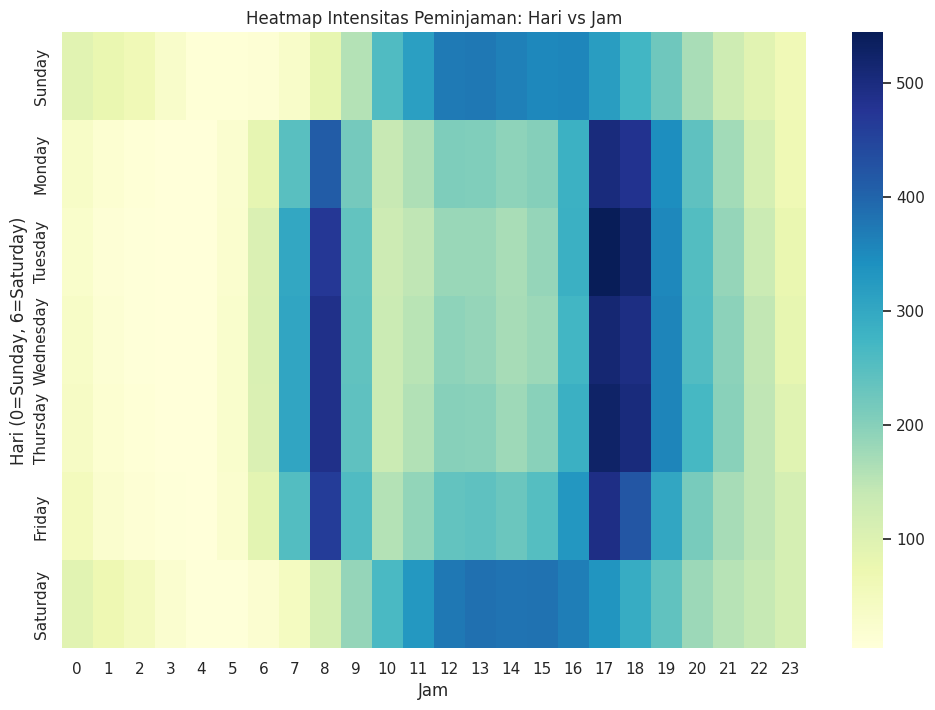

In [58]:
# Heatmap Jam vs Hari dalam Seminggu
plt.figure(figsize=(12, 8))
df_heatmap = hour_df.pivot_table(values='cnt', index='weekday', columns='hour', aggfunc='mean', observed=False)
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=False)
plt.title('Heatmap Intensitas Peminjaman: Hari vs Jam')
plt.xlabel('Jam')
plt.ylabel('Hari (0=Sunday, 6=Saturday)')
plt.show()

### Insight:

**Rata-rata peminjaman sepeda berdasarkan jam (Hari kerja vs Akhir pekan**
* Hari kerja adalah periode paling optimal terjadi pada jam sibuk, yaitu pukul 07.00–09.00 pagi dan 16.00–19.00 sore ➡ pola ini menunjukkan penggunaan sepeda untuk aktivitas berangkat dan pulang kerja.
* Akhir pekan mempunyai pola lebih merata dan mencapai puncak di tengah hari, sekitar pukul 10.00–16.00.

**Pengaruh suhu dan kondisi cuaca terhadap jumlah peminjaman**
* Pada bagian suhu terdapat hubungan positif antara suhu dan jumlah peminjaman. Semakin hangat suhu, jumlah penyewaan cenderung meningkat hingga batas tertentu.
* Pada kondisi cuaca terjadi peminjaman paling tinggi terjadi pada cuaca cerah atau berawan tipis. Sedangkan, pada cuaca buruk seperti hujan lebat atau salju (kategori 3–4), jumlah penyewaan menurun drastis.

**Heatmap intensitas peminjaman: Hari vs Jam**
* Warna paling gelap menunjukkan konsentrasi peminjaman tertinggi. Dengan visualisasi ini membantu mengidentifikasi jam dan hari dengan aktivitas paling padat secara cepat dan presisi.

**Kesimpulan**
* Periode paling optimal untuk memaksimalkan operasional adalah: Hari kerja pada jam sibuk (sekitar pukul 08.00 dan 17.00), serta pada akhir pekan pada siang hari.
* Kondisi optimal didukung oleh cuaca cerah dan suhu udara yang hangat.

## Analisis Lanjutan (Opsional)

### RFM Analysis

RFM analysis ini akan berbasis waktu dan perilaku.
* Recency (R) ➡ akan menghitung dari selisih hari antara tanggal observasi dengan tanggal terakhir penyewaan.
* Frequency (F) ➡ total penyewaan (cnt) dalam periode tertentu.
* Monetary (M) ➡ total penyewaan atau proporsi registered user.

In [59]:
# Set tanggal referensi (tanggal terakhir di dataset)
reference_date = day_df['dteday'].max()

In [60]:
# Agregasi data RFM berbasis bulan
day_df['year_month'] = day_df['dteday'].dt.to_period('M')

rfm_df = (
    day_df.
    groupby('year_month').
    agg(
        Recency=('dteday', lambda x: (reference_date - x.max()).days),
        Frequency = ('cnt', 'sum'),
        Monetary = ('registered', 'sum')
    )
    .reset_index()
)

In [61]:
# Skoring RFM (kuantil 1-5)
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1,2,3,4,5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1,2,3,4,5])

rfm_df['RFM_Score'] = (
    rfm_df['R_score'].astype(int) +
    rfm_df['F_score'].astype(int) +
    rfm_df['M_score'].astype(int)
)

In [62]:
# Segmentasi RFM
def rfm_segment(score):
  if score >= 12:
    return 'High Value Period'
  elif score >= 8:
    return 'Medium Value Period'
  else:
    return 'Low Value Period'

rfm_df['RFM_Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

rfm_df.head()

,year_month,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Segment
0,2011-01,700,38189,35116,1,1,1,3,Low Value Period
1,2011-02,672,48215,41973,1,1,1,3,Low Value Period
2,2011-03,641,64045,51219,1,1,1,3,Low Value Period
3,2011-04,611,94870,72524,1,1,1,3,Low Value Period
4,2011-05,580,135821,104771,1,3,3,7,Low Value Period


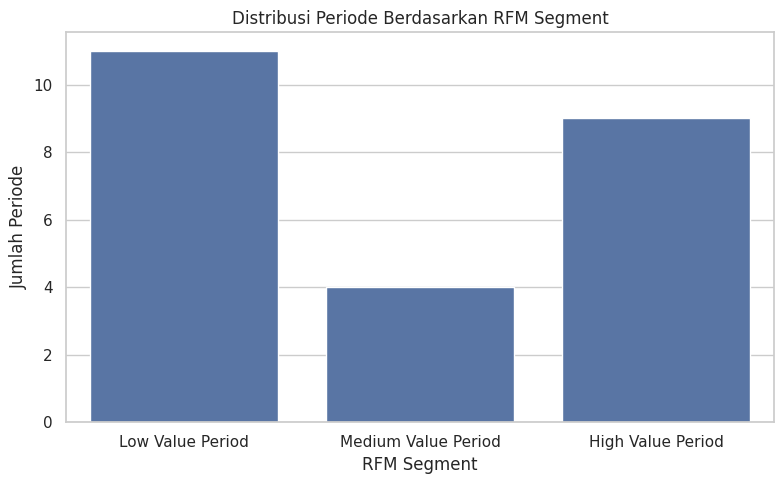

In [63]:
# Visualisasi distribusi segmen RFM
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=rfm_df,
    x='RFM_Segment',
    order=['Low Value Period', 'Medium Value Period', 'High Value Period']
)

plt.title('Distribusi Periode Berdasarkan RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Jumlah Periode')
plt.tight_layout()
plt.show()

### Insight RFM Analysis

* Aktivitas penyewaan tidak tersebar merata sepanjang waktu karena performa bike sharing sangat bergantung pada window waktu tertentu, bukan berjalan stabil sepanjang waktu
* Periode bernilai tinggi didominasi aktivasi terbaru dan intesitas tinggi dengan penyewaan tinggi cenderung terjadi berdekatan secara waktu dan konsisten.
* Registered users menjadi kontributor utama dalan nilai sistem, stabilitas demand lebih banyak ditopang oleh pengguna rutin.
* Sistem bike sharing memiliki periode inti yang layak untuk alokasi armada, kesiapan sistem, dan fokus operasional. Sedangkan pada periode bernilai rendah lebih cocok untuk aktivitas non-kritis seperti maintenance.

### Clustering

Clustering ini akan memetakan pola penggunaan operasional

In [64]:
# Buat kategori demand
# threshold berbasis kuantil
low_thr = day_df['cnt'].quantile(0.33)
high_thr = day_df['cnt'].quantile(0.66)

def demand_level(cnt):
    if cnt <= low_thr:
        return 'Low Demand'
    elif cnt <= high_thr:
        return 'Medium Demand'
    else:
        return 'High Demand'

day_df['demand_level'] = day_df['cnt'].apply(demand_level)

In [65]:
# Definisi cluster berbasi aturan
def usage_cluster(row):
    # Cluster 1: Commuter Peak
    if (
        row['workingday'] == 1 and
        row['demand_level'] == 'High Demand'
    ):
        return 'Commuter Peak Usage'

    # Cluster 2: Leisure Weekend
    if (
        row['workingday'] == 0 and
        row['weathersit'] == 1 and
        row['demand_level'] in ['Medium Demand', 'High Demand']
    ):
        return 'Leisure Usage'

    # Cluster 3: Low Demand Period
    if row['demand_level'] == 'Low Demand':
        return 'Low Demand Period'

    # Cluster 4: Transitional
    return 'Transitional Usage'

day_df['usage_cluster'] = day_df.apply(usage_cluster, axis=1)

In [66]:
# Ringkasan cluster
cluster_summary = (
    day_df
    .groupby('usage_cluster')
    .agg(
        avg_cnt=('cnt', 'mean'),
        total_cnt=('cnt', 'sum'),
        days=('cnt', 'count')
    )
    .reset_index()
)

cluster_summary

,usage_cluster,avg_cnt,total_cnt,days
0,Low Demand Period,2294.439834,552960,241
1,Transitional Usage,5591.263265,2739719,490


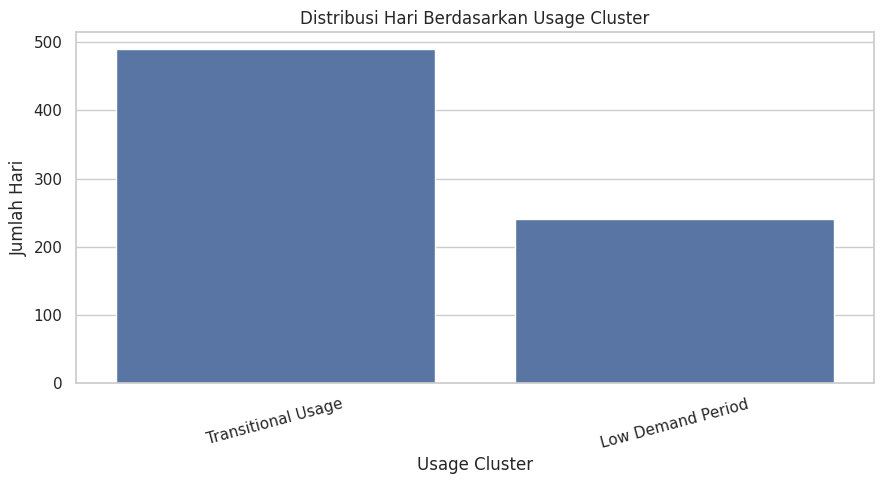

In [67]:
# Visualisasi jumlah hari per cluster
plt.figure(figsize=(9,5))
sns.countplot(
    data=day_df,
    x='usage_cluster',
    order=day_df['usage_cluster'].value_counts().index
)

plt.title('Distribusi Hari Berdasarkan Usage Cluster')
plt.xlabel('Usage Cluster')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

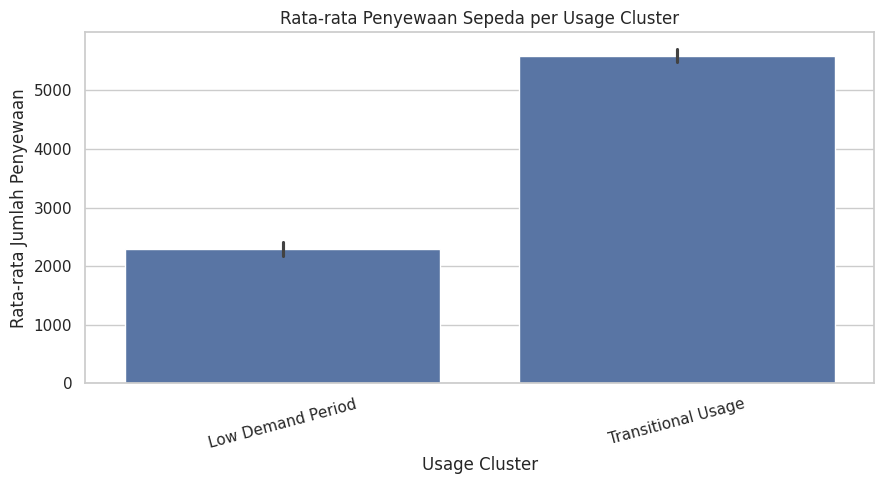

In [68]:
# Visualisasi rata-rata penyewaan per cluster
plt.figure(figsize=(9,5))
sns.barplot(
    data=day_df,
    x='usage_cluster',
    y='cnt',
    estimator='mean'
)

plt.title('Rata-rata Penyewaan Sepeda per Usage Cluster')
plt.xlabel('Usage Cluster')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Insight Clustering

* Cluster commuter peak merupakan tulang punggung sistem, hal ini menandakan bahwa layanan bike sharing berperan penting sebagai alat transportasi komuter.
* Cluster leisure usage sangat bergantung pada kondisi eksternal seperti faktor lingkungan.
* Low demand period menyediakan jendela operasional yang strategis untuk menjadi waktu optimal maintenance, redistribusi sepeda dan penghematan operasional.

## Conclusion

- Conclution pertanyaan 1: **Bagaimana pola penyewaan sepeda berdasarkan waktu dan jenis hari?**

Secara keseluruhan, pola penyewaan sepeda menunjukkan perbedaan yang jelas antara hari kerja dan hari libur: pada hari kerja terdapat dua puncak utama pada pukul 08.00 dan 17.00 yang mencerminkan aktivitas berangkat dan pulang kerja, sedangkan hari libur cenderung lebih landai dengan puncak di siang hari (12.00–15.00) yang bersifat rekreatif. Penyewaan relatif stabil sepanjang minggu, dengan sedikit peningkatan pada Jumat dan Sabtu yang menandakan kenaikan aktivitas menjelang akhir pekan. Secara bulanan, jumlah penyewaan meningkat pada pertengahan tahun terutama Juni–September dan menurun pada awal tahun seperti Januari–Februari, mengindikasikan pengaruh musim. Penyewaan tertinggi terjadi pada musim gugur (fall), sementara pada hari libur jumlahnya cenderung lebih rendah dibanding hari kerja, menunjukkan bike sharing lebih sering digunakan untuk kebutuhan rutin. Pola heatmap hari–jam memperkuat temuan ini, dengan rush hour pada Senin–Jumat pukul 07.00–09.00 dan 17.00–18.00 yang didominasi pekerja dan pelajar, serta leisure peak pada Sabtu–Minggu pukul 10.00–17.00 dengan penggunaan yang stabil sepanjang siang.


- Conclution pertanyaan 2: **Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**

Pola penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca, di mana cuaca cerah menjadi prime time dengan jumlah penyewaan tertinggi. Ketika kondisi cuaca memburuk menjadi berkabut atau mendung (misty), jumlah penyewaan menurun secara signifikan, dan penurunan paling tajam terjadi pada saat hujan ringan atau salju. Pada kondisi cuaca ekstrem, permintaan tidak hanya menurun tetapi dapat berhenti hampir sepenuhnya, menunjukkan cuaca sebagai faktor krusial dalam penggunaan layanan bike sharing.

- Conclution pertanyaan 3: **Pada jam berapa sistem bike sharing mengalami beban tertinggi dan bagaimanna karakteristik waktunya?**

Penyewaan sepeda mencapai puncak pada pukul 17.00–18.00 dan puncak tambahan sekitar pukul 08.00, menjadikannya jam penggunaan paling krusial. Pada hari kerja, pola membentuk dua lonjakan jelas saat jam berangkat dan pulang kerja yang didominasi komuter, sedangkan pada hari libur atau akhir pekan pola lebih landai dengan peningkatan bertahap mulai pukul 10.00 dan puncak siang–sore (12.00–15.00) untuk aktivitas rekreasi. Beban terendah terjadi pada dini hari pukul 00.00–04.00 ketika mobilitas berada pada titik minimum.

- Conclution pertanyaan 4: **Apakah terdapat perubahan tren jumlah penyewaan sepeda antara tahun 2011 dan 2012?**

Total penyewaan bike sharing pada tahun 2012 jauh lebih tinggi dibandingkan 2011, dan tren bulanan menunjukkan hampir seluruh bulan di 2012 konsisten melampaui bulan yang sama di 2011. Hal ini menegaskan adanya tren pertumbuhan yang jelas dan berkelanjutan, yang menunjukkan meningkatnya minat masyarakat terhadap layanan bike sharing, kemungkinan turut didorong oleh penambahan armada atau perluasan stasiun.

- Conclution pertanyaan 5: **Berdasarkan pola waktu dan kondisi cuaca, kapan periode optimal untuk memaksimalkan operasional layanan bike sharing?**

Rata-rata peminjaman sepeda menunjukkan bahwa hari kerja paling optimal terjadi pada jam sibuk pagi (07.00–09.00) dan sore (16.00–19.00) yang mencerminkan aktivitas komuter, sementara pada akhir pekan pola lebih merata dengan puncak di tengah hari (10.00–16.00). Jumlah peminjaman meningkat seiring suhu yang lebih hangat hingga batas tertentu dan mencapai level tertinggi pada kondisi cuaca cerah atau berawan tipis, namun menurun drastis saat cuaca buruk seperti hujan lebat atau salju. Heatmap hari–jam memperlihatkan konsentrasi peminjaman tertinggi secara jelas, sehingga dapat disimpulkan bahwa periode paling optimal untuk operasional adalah hari kerja saat jam sibuk serta akhir pekan di siang hari, dengan dukungan cuaca cerah dan suhu yang hangat.

**Menyimpan main data**

In [69]:
# Menyatukan dua dataset yaitu hour_df dan day_df
main_data_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    on="dteday",
    suffixes=('_hour', '_day') # Memberi tanda jika ada kolom yang namanya sama
)

In [70]:
# Mengecek dengan menampilkan data
main_data_df.head()

,dteday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weather_situation_hour,temp_norm_hour,...,windspeed_norm_day,casual_day,registered_day,cnt_day,humidity_day,humidity_category_day,numeric_month,year_month,demand_level,usage_cluster
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,Weekend/Holiday,Clear,0.24,...,0.160446,331,654,985,80.5833,Terlalu Lembab,1,2011-01,Low Demand,Low Demand Period
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,Weekend/Holiday,Clear,0.22,...,0.160446,331,654,985,80.5833,Terlalu Lembab,1,2011-01,Low Demand,Low Demand Period
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,Weekend/Holiday,Clear,0.22,...,0.160446,331,654,985,80.5833,Terlalu Lembab,1,2011-01,Low Demand,Low Demand Period
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,Weekend/Holiday,Clear,0.24,...,0.160446,331,654,985,80.5833,Terlalu Lembab,1,2011-01,Low Demand,Low Demand Period
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,Weekend/Holiday,Clear,0.24,...,0.160446,331,654,985,80.5833,Terlalu Lembab,1,2011-01,Low Demand,Low Demand Period


In [71]:
# Menyimpan main_data_df
main_data_df.to_csv("main_data.csv", index=False)